In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import matplotlib.image as mpimg #Has useful functions that can directly read in jpeg and png files and convert them into numpy arrays

Reading An Image File:

In [ ]:
image_as_array = mpimg.imread('palm_trees.jpg')
#From matplotlib's image library, the imread function reads in an image and converts it to a 3-dimensional array of pixel locations and each of their color channels' values (RGB)

In [6]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  98],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 106],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 114],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [ ]:
image_as_array.shape #This 3-dimensional array denotes a height of 1401 pixels, a width of 934 pixels, and 3 color channels

(1401, 934, 3)

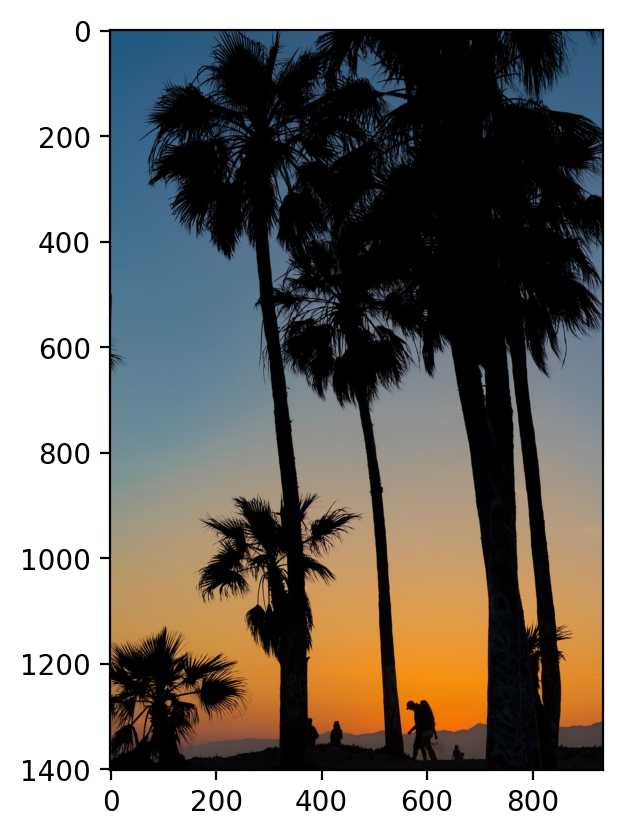

In [9]:
plt.figure(dpi = 200)
plt.imshow(image_as_array)

Converting Image Array To 2-Dimensional Array:

In [10]:
# (H, W, C) ---> 2D (H * W, C)

In [12]:
(h, w, c) = image_as_array.shape

In [13]:
h

1401

In [14]:
w

934

In [15]:
c

3

In [16]:
image_as_array2d = image_as_array.reshape(h * w, c)
#Reshaping the image array to a 2D array

In [17]:
image_as_array2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], shape=(1308534, 3), dtype=uint8)

In [18]:
len(image_as_array.shape)

3

In [20]:
len(image_as_array2d.shape)

2

Performing K-Means Clustering On The Image:

In [21]:
from sklearn.cluster import KMeans

In [22]:
model = KMeans(n_clusters = 6) #For color quantization, n_clusters specifies the number of unique colors you want the resulting image to have

In [23]:
labels = model.fit_predict(image_as_array2d) #K-Means Clustering requires arrays and dataframes to be 2D

In [24]:
1401 * 934 #The number of data points the model had to train on

1308534

In [25]:
labels

array([2, 2, 2, ..., 0, 0, 0], shape=(1308534,), dtype=int32)

In [26]:
model.cluster_centers_ #Returns the cluster centers, which in this case, are the 6 averaged RGB values

array([[  2.77464305,   2.57357751,   3.6824999 ],
       [195.84961055, 154.510239  , 104.63065042],
       [ 72.55798641, 110.19364584, 138.04329062],
       [219.34028686, 133.65041206,  43.91361583],
       [141.10236916, 145.09971306, 142.56178868],
       [ 67.28361725,  61.7930846 ,  62.20683732]])

In [ ]:
rgb_codes = model.cluster_centers_.round(0).astype(int)
#You can't have decimal values for RGB codes, so they must be rounded and converted to int type

In [28]:
rgb_codes

array([[  3,   3,   4],
       [196, 155, 105],
       [ 73, 110, 138],
       [219, 134,  44],
       [141, 145, 143],
       [ 67,  62,  62]])

In [29]:
rgb_codes[labels]

array([[ 73, 110, 138],
       [ 73, 110, 138],
       [ 73, 110, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]], shape=(1308534, 3))

Reverting New Array To 3D:

In [30]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [31]:
quantized_image

array([[[ 73, 110, 138],
        [ 73, 110, 138],
        [ 73, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 73, 110, 138],
        [ 73, 110, 138]],

       [[ 73, 110, 138],
        [ 73, 110, 138],
        [ 73, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 73, 110, 138],
        [ 73, 110, 138]],

       [[ 73, 110, 138],
        [ 73, 110, 138],
        [ 73, 110, 138],
        ...,
        [ 73, 110, 138],
        [ 73, 110, 138],
        [ 73, 110, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

Displaying The Quantized Image:

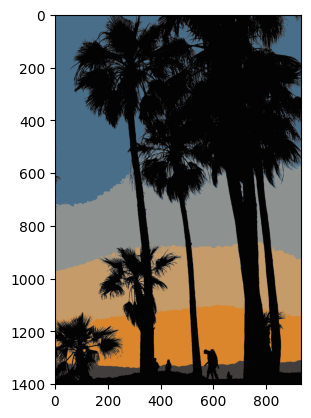

In [32]:
plt.imshow(quantized_image)